# Cybersecurity Threats (2015-2019): Exploratory Data Analysis

## 1. Introduction

The goal of this Exploratory Data Analysis (EDA) is to obtain insights into cybersecurity threats from 2015 to 2024. The dataset, sourced from [Kaggle](https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024), includes general trends, financial impacts, resolution times, vulnerabilities, defense mechanisms, and comparative aspects of threats during this period.

### Research Questions
**1. General Trends and Patterns**
- How has the frequency of different attack types evolved over the years?
- Which countries experience the highest number of cyberattacks, and how do they compare in terms of financial loss?
- What are the most common security vulnerabilities exploited in each industry?

**2. Financial Impact**
- Which attack types result in the highest financial losses on average?
- Is there a relationship between the number of affected users and financial loss for different attack types?
- How does financial loss vary by target industry and country?

**3. Resolution Time**
- Does the resolution time vary significantly across different attack types or defense mechanisms used?
- Are certain industries better at resolving incidents quickly compared to others?

**4. Vulnerabilities and Defense Mechanisms**
- What are the most common security vulnerabilities exploited by different attack sources (e.g., nation-state vs hacker group)?
- Which defense mechanisms are most commonly used for specific vulnerabilities, and how effective are they (e.g., based on resolution time)?

**5. Temporal Analysis**
- Are there any noticeable trends in the number of incidents or financial losses over time (e.g., pre-2020 vs post-2020)?
- Do certain attack types or vulnerabilities show seasonal or yearly patterns?

**6. Industry-Specific Insights**
- Which industries are most targeted by specific attack types (e.g., healthcare for ransomware)?
- How do industries differ in their choice of defense mechanisms?

**7. Comparative Analysis**
- How do nation-state attacks differ from hacker group attacks in terms of financial loss, affected users, and resolution time?
- Are there differences in attack patterns between developed countries (e.g., USA) and developing countries (e.g., Brazil)?

### Purpose and Importance
These findings can guide strategic decision-making to mitigate the financial and operational impacts of cyber threats effectively.

<br>

## 2. Data Overview

### Data Acquisition

The data provided by Kaggle can be accessed through the link provided below:
- [Download Data](https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024)

### Key Features of the Dataset

- **Country:** Country where the attack occurred.

- **Year:** Year of the incident.

- **Attack Type:** Method of attack (e.g., Phishing, SQL Injection).

- **Target Industry:** Industry targeted (e.g., Finance, Healthcare).

- **Number of Affected Users:** Volume of users impacted.

- **Financial Impact ($M):** Estimated financial loss in millions.

- **Response Time (Hours):** Time taken to mitigate the attack.

- **Defense Mechanism Used:** Countermeasures taken.

### Notice
The dataset analyzed in this study is extremely uniform. This narrow perspective may overlook diverse cybersecurity practices, regional variations, and the effectiveness of specific tools. Further research with enriched and more detailed data is essential to overcome these limitations and gain a deeper, more nuanced understanding of the cyber threat landscape.

<br>

## 3. Initial Data Exploration

In this section, the necessary libraries and datasets needed for analysis will be imported and initialized.

The following libraries are used:
- Library `pandas` will be required to work with data in tabular representation.

- Library `numpy` will be required to round the numerical data.

- Library `scipy` will be required to visualize statistical values in the data.

- Library `matplotlib`, `seaborn`, `plotly` will be required for data visualization.

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr, kendalltau
from scipy.stats import chi2_contingency, f_oneway
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
%matplotlib inline

# Settings
sns.set_theme(style="darkgrid")
pd.set_option('display.max_rows', 10)
pio.renderers.default = 'notebook'

# Set up logging
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Import data and save it as DataFrame
data_df = pd.read_csv('/kaggle/input/global-cybersecurity-threats-2015-2024/Global_Cybersecurity_Threats_2015-2024.csv', low_memory=False)

In [3]:
# Dimensions of the data
print(f'The data contains {data_df.shape[0]} records and {data_df.shape[1]} columns.')

# Datatypes of the data
print(f'\nThe data contains the following data types: \n{data_df.dtypes.value_counts()}')

# Display driver data
data_df.head()

The data contains 3000 records and 10 columns.

The data contains the following data types: 
object     6
int64      3
float64    1
Name: count, dtype: int64


Country  Year        Attack Type     Target Industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-in-the-Middle                  IT   
3       UK  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-in-the-Middle                  IT   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  Hacker Group   
1                          62.19                    295961  Hacker Group   
2                          38.65                    605895  Hacker Group   
3                          41.44                    659320  Nation-state   
4                          74.41                    810682       Insider   

  Security Vulnerability Type Defense Mechanism Used  \
0          Unpatched Software                    VPN   
1          Unpatched Software               Firewall   
2              Weak Passwords                    VPN   
3          Social Engineering     AI-based Detection   
4          Social Engineering                    VPN   

   Incident Resolution Time (in Hours)  
0                                   63  
1                                   71  
2                                   20  
3                                    7  
4                                   68

<br>

## 4. Data Cleaning and Preprocessing

In this section, data pre-processing will be conducted by examining data types, addressing missing values, removing duplicates, analyzing measures of central tendency, and extracting features.

In [4]:
# Initialize a list to store the results
missing_vals = []

# Check percentage of missing data
df_copy = data_df.copy()
for col in df_copy.columns:
    pct_missing = df_copy[col].isnull().mean()
    missing_vals.append(f'{col} - {pct_missing:.0%}')

# Join the results into a single string and print
print(', '.join(missing_vals))

Country - 0%, Year - 0%, Attack Type - 0%, Target Industry - 0%, Financial Loss (in Million $) - 0%, Number of Affected Users - 0%, Attack Source - 0%, Security Vulnerability Type - 0%, Defense Mechanism Used - 0%, Incident Resolution Time (in Hours) - 0%


In [5]:
# Find any NaN values
df_copy.isnull().values.any()

False

**CONCLUSION:**

The dataset contains no missing values, so no additional modifications are needed.

### 4.2 Duplicates

The data can be reduced or simplified by identifying and removing duplicate entries.

In [6]:
# Check for duplicates in columns
duplicate_vals = []

for col in df_copy:
    if df_copy[col].duplicated().any() == True:
        duplicate_vals.append(f'Column {col} contains duplicates.')
    else:
        duplicate_vals.append(f'Column {col} contains no duplicates.')

# Join the results into a single string and print
print(', '.join(duplicate_vals))

Column Country contains duplicates., Column Year contains duplicates., Column Attack Type contains duplicates., Column Target Industry contains duplicates., Column Financial Loss (in Million $) contains duplicates., Column Number of Affected Users contains duplicates., Column Attack Source contains duplicates., Column Security Vulnerability Type contains duplicates., Column Defense Mechanism Used contains duplicates., Column Incident Resolution Time (in Hours) contains duplicates.


All columns in the dataset contain duplicates. This is expected because cybersecurity threats are not unique; therefore, it is common for the industry, source, and types of vulnerabilities to repeat. Consequently, there is no need to remove these duplicates. However, it is important to examine the data for anomalies, such as spelling errors, inconsistent casing, or typographical mistakes.

In [7]:
# Strip whitespace
for col in df_copy:
    if df_copy[col].dtype == 'object':
        print(f'Column: {col}')
        print(f'Unique values before stripping: {len(set(df_copy[col]))}')
        print(f'Unique values after stripping: {len(set(df_copy[col]))}\n')

Column: Country
Unique values before stripping: 10
Unique values after stripping: 10

Column: Attack Type
Unique values before stripping: 6
Unique values after stripping: 6

Column: Target Industry
Unique values before stripping: 7
Unique values after stripping: 7

Column: Attack Source
Unique values before stripping: 4
Unique values after stripping: 4

Column: Security Vulnerability Type
Unique values before stripping: 4
Unique values after stripping: 4

Column: Defense Mechanism Used
Unique values before stripping: 5
Unique values after stripping: 5



In [8]:
# Frequency analysis
for col in df_copy:
    print(f'Column: {col}')
    print(df_copy[col].value_counts(), "\n")

Column: Country
Country
UK           321
Brazil       310
India        308
France       305
Japan        305
Australia    297
Russia       295
Germany      291
USA          287
China        281
Name: count, dtype: int64 

Column: Year
Year
2017    319
2022    318
2023    315
2020    315
2018    310
2024    299
2021    299
2016    285
2015    277
2019    263
Name: count, dtype: int64 

Column: Attack Type
Attack Type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64 

Column: Target Industry
Target Industry
IT                    478
Banking               445
Healthcare            429
Retail                423
Education             419
Telecommunications    403
Government            403
Name: count, dtype: int64 

Column: Financial Loss (in Million $)
Financial Loss (in Million $)
17.99    4
15.14    3
53.07    3
98.07    3
30.68    3
        ..
9.90     1
18.48  

**CONCLUSION:** 

The data was processed to the point where only valid duplicates exist. Therefore, no further data transformation is necessary.

### 4.3 Transformation

In [9]:
# Check column data type
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


Data types classified as `object` typically consume more memory than other data types, which can result in delays during program execution. Consequently, these data types are good candidates for conversion to `categorical`. A categorical variable has a limited and often fixed number of possible values. 

In [10]:
# Convert object dtype columns to category dtype
for col in df_copy.select_dtypes(include=['object']).columns:
    if col != 'Date':
        df_copy[col] = df_copy[col].astype('category')

# Verify the conversion
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Country                              3000 non-null   category
 1   Year                                 3000 non-null   int64   
 2   Attack Type                          3000 non-null   category
 3   Target Industry                      3000 non-null   category
 4   Financial Loss (in Million $)        3000 non-null   float64 
 5   Number of Affected Users             3000 non-null   int64   
 6   Attack Source                        3000 non-null   category
 7   Security Vulnerability Type          3000 non-null   category
 8   Defense Mechanism Used               3000 non-null   category
 9   Incident Resolution Time (in Hours)  3000 non-null   int64   
dtypes: category(6), float64(1), int64(3)
memory usage: 113.0 KB


**CONCLUSION:** 

All data are in the correct types and formats; therefore, no further data transformation is needed.

### 4.4 Feature Engineering

Sorting the columns by `Year` will facilitate analysis and improve readability.

In [11]:
# Sort the DataFrame by 'Year ' in descending order
df_copy = df_copy.sort_values(by='Year', ascending=True).reset_index(drop=True)
df_copy.head(2)

Country  Year        Attack Type Target Industry  \
0  Germany  2015  Man-in-the-Middle              IT   
1      USA  2015      SQL Injection          Retail   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          54.54                    775866       Insider   
1                          26.98                    763017       Insider   

  Security Vulnerability Type Defense Mechanism Used  \
0              Weak Passwords     AI-based Detection   
1          Social Engineering               Firewall   

   Incident Resolution Time (in Hours)  
0                                   69  
1                                   24

**CONCLUSION:** 

All essential data columns, formatting, and feature engineering have been applied; therefore, no further data transformation is necessary.

### 4.5 Outliers

Outliers can distort and mislead the analysis process, resulting in inaccurate predictions and insights. Therefore, addressing outliers is essential when preparing data for analysis or machine learning models. 

Generating summary statistics is a quick and effective way to assess whether a dataset contains outliers.

In [12]:
# Check summary statistics
df_copy.describe()

Year  Financial Loss (in Million $)  Number of Affected Users  \
count  3000.000000                    3000.000000               3000.000000   
mean   2019.570333                      50.492970             504684.136333   
std       2.857932                      28.791415             289944.084972   
min    2015.000000                       0.500000                424.000000   
25%    2017.000000                      25.757500             255805.250000   
50%    2020.000000                      50.795000             504513.000000   
75%    2022.000000                      75.630000             758088.500000   
max    2024.000000                      99.990000             999635.000000   

       Incident Resolution Time (in Hours)  
count                          3000.000000  
mean                             36.476000  
std                              20.570768  
min                               1.000000  
25%                              19.000000  
50%                              37.000000  
75%                              55.000000  
max                              72.000000

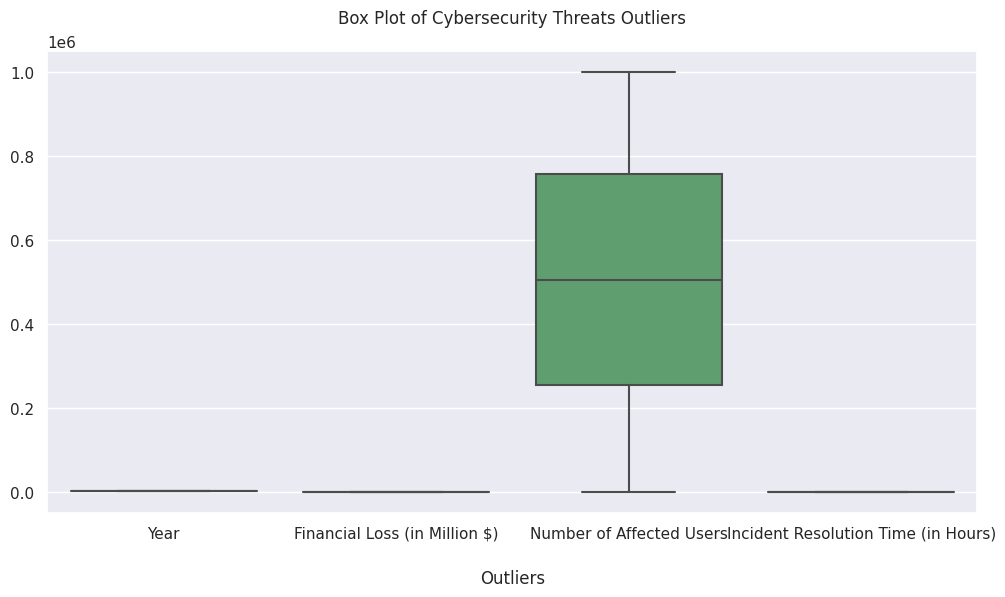

In [13]:
# Visualize with a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy)
plt.title('Box Plot of Cybersecurity Threats Outliers', pad=20)
plt.xticks(rotation=0)
plt.xlabel('Outliers', labelpad=20)
plt.show()

There seems to be no outliers within this dataset. To analyze this further, we can utilize statistical measures such as the Z-score and the Interquartile Range (IQR) to truly see if this observation is correct.

In [14]:
# Define numerical columns
numerical_columns = ['Year', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']

# Identify outliers using Z-score
z_scores = np.abs(stats.zscore(df_copy[numerical_columns]))
outliers_z = (z_scores > 3).any(axis=1)  # Identify rows with any column as an outlier

# Identify outliers using IQR
Q1 = df_copy[numerical_columns].quantile(0.25)
Q3 = df_copy[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (df_copy[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_copy[numerical_columns] > (Q3 + 1.5 * IQR))
outliers_iqr = outliers_iqr.any(axis=1)  # Identify rows with any column as an outlier

# Print outliers
print("Outliers detected using Z-score:\n", df_copy[outliers_z])
print("Outliers detected using IQR:\n", df_copy[outliers_iqr])

Outliers detected using Z-score:
 Empty DataFrame
Columns: [Country, Year, Attack Type, Target Industry, Financial Loss (in Million $), Number of Affected Users, Attack Source, Security Vulnerability Type, Defense Mechanism Used, Incident Resolution Time (in Hours)]
Index: []
Outliers detected using IQR:
 Empty DataFrame
Columns: [Country, Year, Attack Type, Target Industry, Financial Loss (in Million $), Number of Affected Users, Attack Source, Security Vulnerability Type, Defense Mechanism Used, Incident Resolution Time (in Hours)]
Index: []


**CONCLUSION:** 

There are no outliers to account for. Thus no more transformations are required.

<br>

## 5. Univariate Analysis

Each variable can be examined individually to understand its distribution, central tendency, and variability more clearly. This understanding is crucial for identifying the nature of the data, such as whether it is normally distributed or skewed, which is a crucial step in the data analysis process as it provides a comprehensive understanding of a single variable's purpose and characteristics. 

### 5.1 Categorical Values

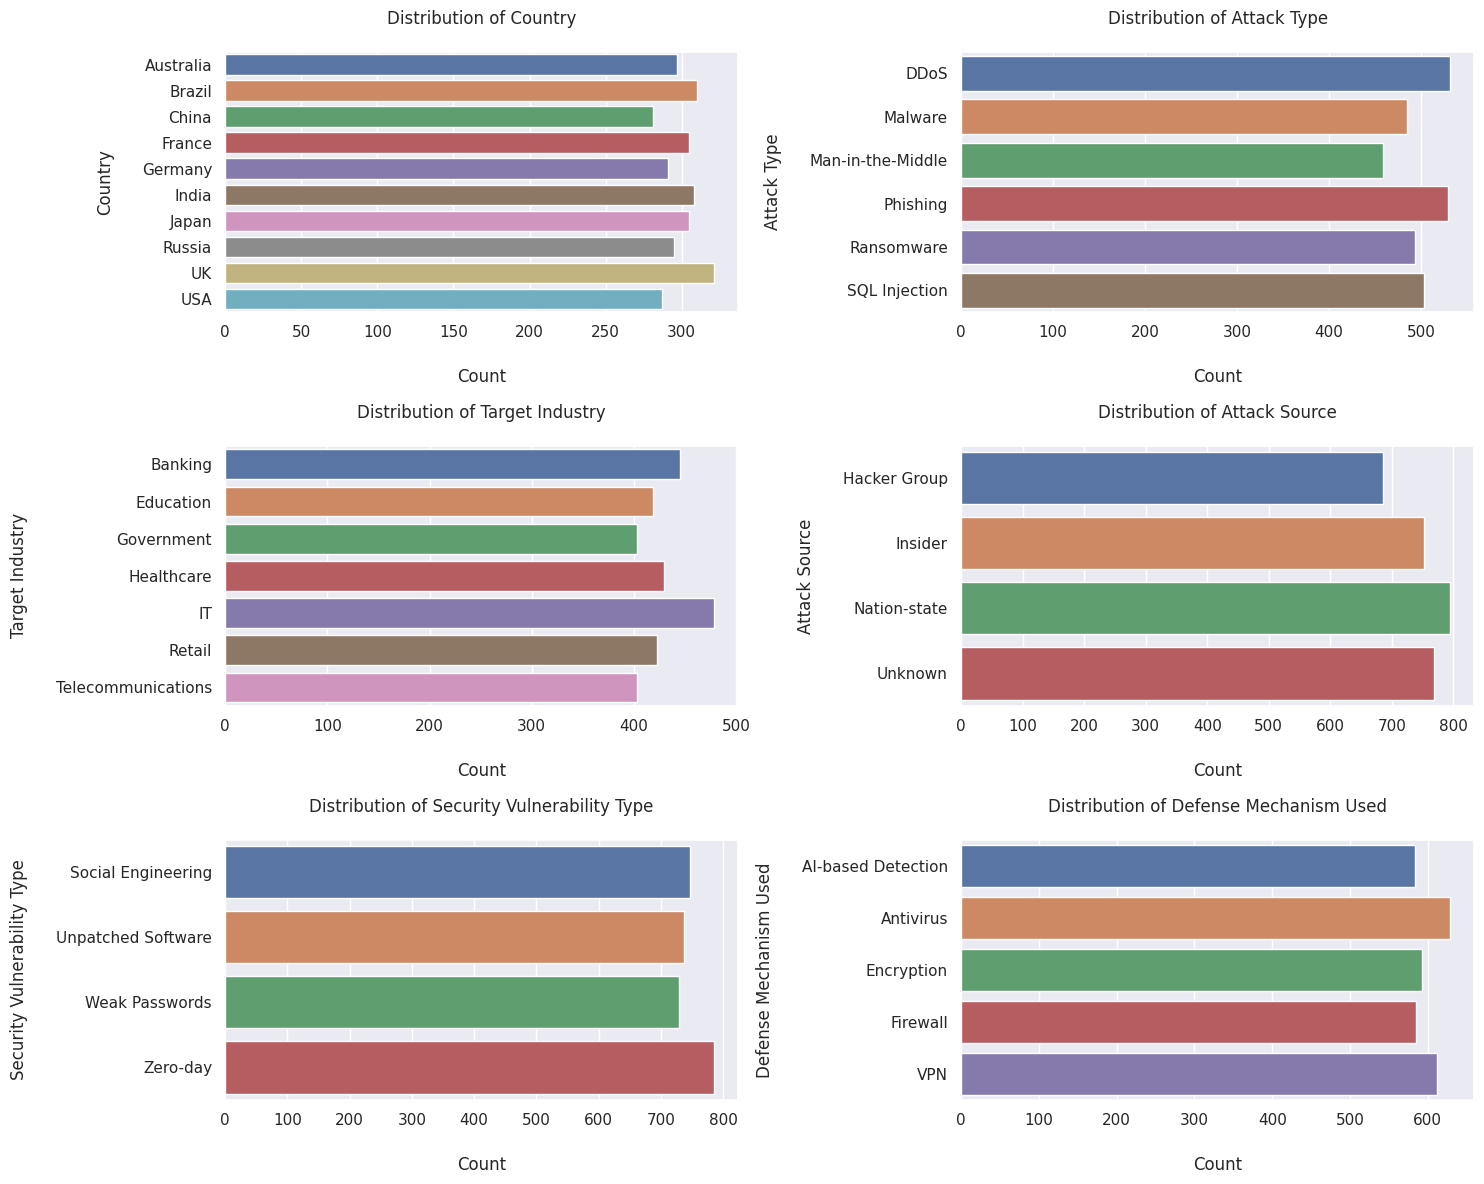

In [15]:
# List of categorical columns to inspect
categorical_columns = ['Country', 'Attack Type', 'Target Industry', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used']

# Set up the subplot grid
num_cols = 2
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(y=col, data=df_copy, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', pad=20)
    axes[i].set_xlabel('Count', labelpad=20)
    axes[i].set_ylabel(col, labelpad=20)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**INSIGHTS:** 

- The categorical variables seem to follow a uniform distribution. A uniform distribution means that each category occurs with approximately the same frequency, thus reducing the risk of bias in the analysis.

### 5.2 Numerical Values

Skewness: [-0.02749917 -0.01685196 -0.02538421  0.01109825], Kurtosis: [1.77021158 1.78976892 1.79630188 1.80737075]


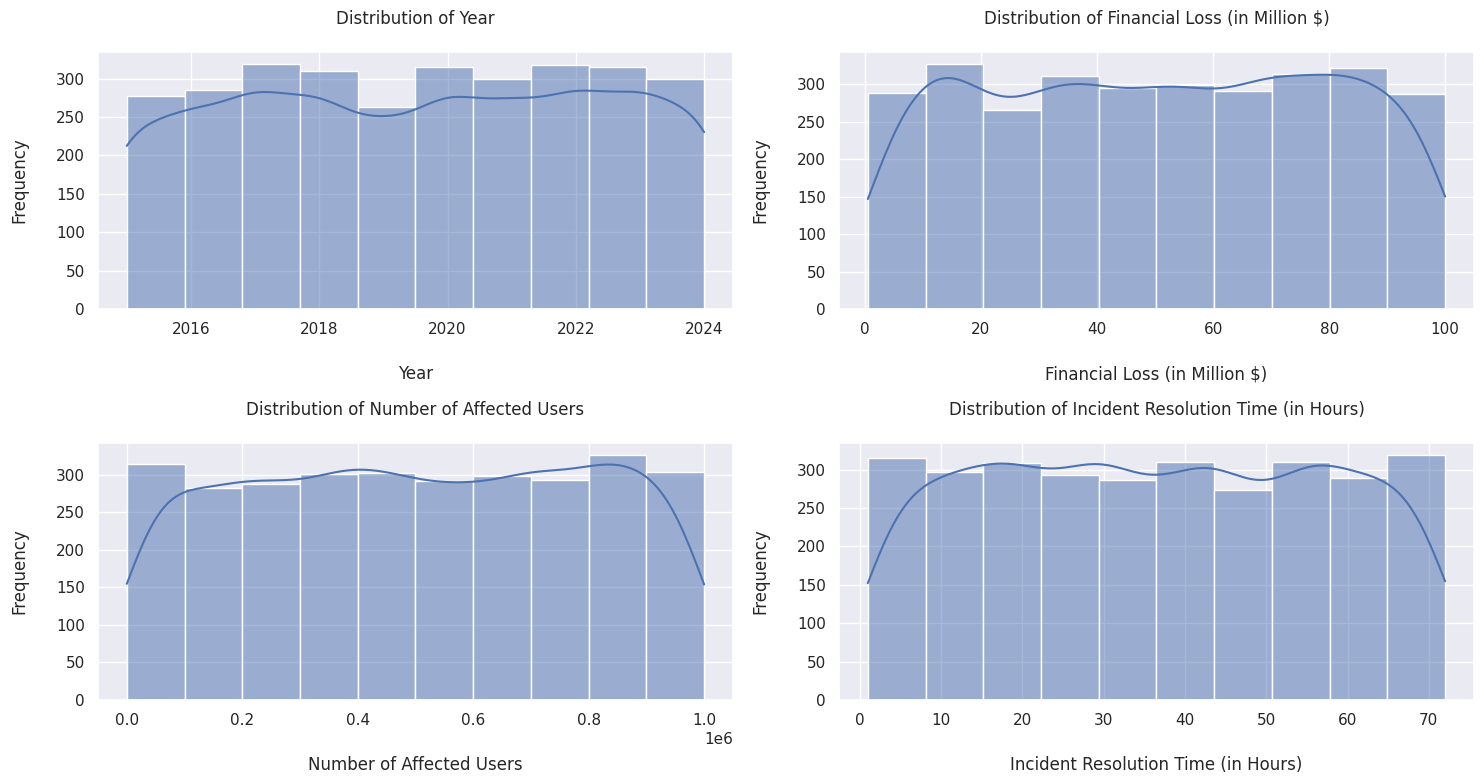

In [16]:
# Skewness and Kurtosis
skewness = stats.skew(df_copy[numerical_columns])
kurtosis = stats.kurtosis(df_copy[numerical_columns]) + 3  # Adjusted for normal distribution
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

# Set up the subplot grid
num_cols = 2
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df_copy[col], bins=10, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}', pad=20)
    axes[i].set_xlabel(col, labelpad=20)
    axes[i].set_ylabel('Frequency', labelpad=20)
    axes[i].tick_params(axis='x')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**INSIGHTS:** 

- The skewness values [-0.02749917, -0.01685196, -0.02538421, 0.01109825] are all close to 0, suggesting that the distributions are approximately symmetric.

- Therefore the numeric variables also follow a uniform distribution. A uniform distribution means that each category occurs with approximately the same frequency, thus reducing the risk of bias in the analysis.

<br>

## 6. Bivariate Analysis

The relationships between variables can be examined to uncover patterns, correlations, or associations. This will help determine whether there is a statistical relationship between two variables and, if so, the nature and strength of that relationship.

### 6.1 Numerical vs. Numerical

Correlation between Year and Financial Loss (in Million $): 0.01
Correlation between Number of Affected Users and Financial Loss (in Million $): 0.00
Correlation between Financial Loss (in Million $) and Incident Resolution Time (in Hours): -0.01
Correlation between Number of Affected Users and Year: 0.00
Correlation between Number of Affected Users and Incident Resolution Time (in Hours): 0.01


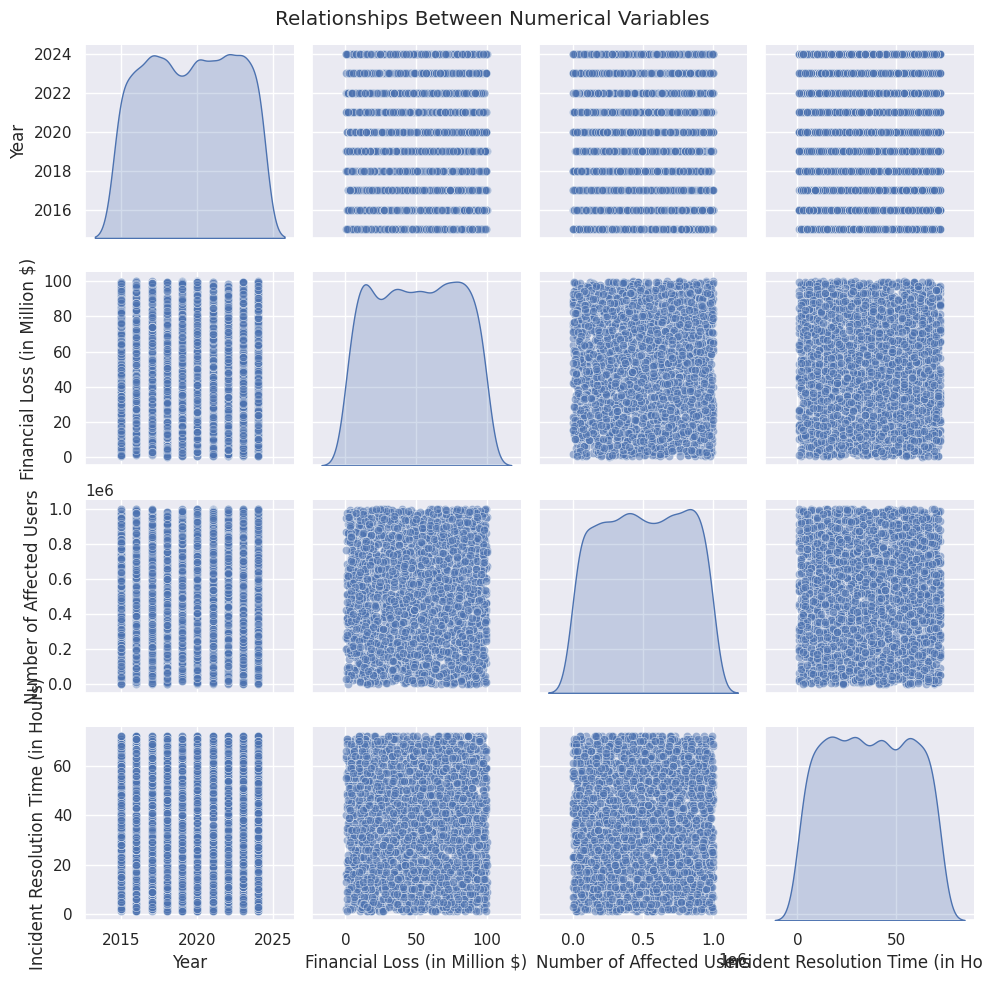

Spearman Correlation: 0.01
Kendall Tau: 0.01
Polynomial Regression MSE: 775.06


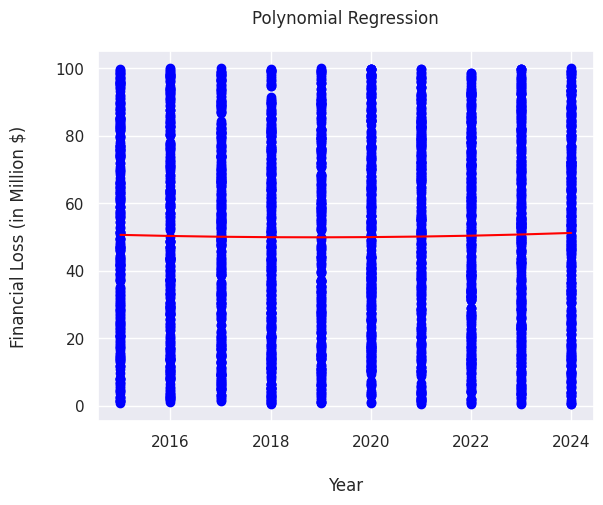

In [17]:
# Calculate and print individual correlations
correlation = df_copy['Year'].corr(df_copy['Financial Loss (in Million $)'])
print(f"Correlation between Year and Financial Loss (in Million $): {correlation:.2f}")
correlation = df_copy['Number of Affected Users'].corr(df_copy['Financial Loss (in Million $)'])
print(f"Correlation between Number of Affected Users and Financial Loss (in Million $): {correlation:.2f}")
correlation = df_copy['Financial Loss (in Million $)'].corr(df_copy['Incident Resolution Time (in Hours)'])
print(f"Correlation between Financial Loss (in Million $) and Incident Resolution Time (in Hours): {correlation:.2f}")
correlation = df_copy['Number of Affected Users'].corr(df_copy['Year'])
print(f"Correlation between Number of Affected Users and Year: {correlation:.2f}")
correlation = df_copy['Number of Affected Users'].corr(df_copy['Incident Resolution Time (in Hours)'])
print(f"Correlation between Number of Affected Users and Incident Resolution Time (in Hours): {correlation:.2f}")

# Visual Exploration
sns.pairplot(df_copy, 
    diag_kind='kde',
    plot_kws={'alpha': 0.5}
    )
plt.suptitle('Relationships Between Numerical Variables')
plt.tight_layout()
plt.show()

# Non-Linear Correlation
spearman_corr, _ = spearmanr(df_copy['Year'], df_copy['Financial Loss (in Million $)'])
kendall_corr, _ = kendalltau(df_copy['Year'], df_copy['Financial Loss (in Million $)'])
print(f"Spearman Correlation: {spearman_corr:.2f}")
print(f"Kendall Tau: {kendall_corr:.2f}")

# Polynomial Regression
X = df_copy[['Year']]
y = df_copy['Financial Loss (in Million $)']
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Polynomial Regression MSE: {mean_squared_error(y_test, y_pred):.2f}")

# Plot Polynomial Regression
plt.scatter(df_copy['Year'], df_copy['Financial Loss (in Million $)'], color='blue')
plt.plot(df_copy['Year'], model.predict(poly.fit_transform(df_copy[['Year']])), color='red')
plt.xlabel('Year', labelpad=20)
plt.ylabel('Financial Loss (in Million $)', labelpad=20)
plt.title('Polynomial Regression', pad=20)
plt.show()

**INSIGHTS:** 

- The data suggests that there are no strong linear relationships between the numerical variables analyzed.

- This is supported by both the correlation graphs and the Spearman and Kendall coefficients, which are close to zero, indicating weak or no monotonic relationships between the variables.

### 6.2 Categorical vs. Categorical

In [18]:
df_copy.head()

Country  Year        Attack Type Target Industry  \
0  Germany  2015  Man-in-the-Middle              IT   
1      USA  2015      SQL Injection          Retail   
2   Russia  2015         Ransomware          Retail   
3  Germany  2015               DDoS          Retail   
4    India  2015  Man-in-the-Middle         Banking   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          54.54                    775866       Insider   
1                          26.98                    763017       Insider   
2                          84.08                     71334       Unknown   
3                           7.84                    323011  Nation-state   
4                          97.28                    694308  Nation-state   

  Security Vulnerability Type Defense Mechanism Used  \
0              Weak Passwords     AI-based Detection   
1          Social Engineering               Firewall   
2          Unpatched Software     AI-based Detection   
3          Social Engineering             Encryption   
4              Weak Passwords                    VPN   

   Incident Resolution Time (in Hours)  
0                                   69  
1                                   24  
2                                   26  
3                                   25  
4                                   66

Contingency Table: Attack Type vs Country


Country            Australia  Brazil  China  France  Germany  India  Japan  \
Attack Type                                                                  
DDoS                      61      61     48      50       43     50     49   
Malware                   61      51     44      47       45     47     49   
Man-in-the-Middle         45      44     44      38       49     46     55   
Phishing                  51      54     49      64       46     51     57   
Ransomware                40      43     51      51       46     59     41   
SQL Injection             39      57     45      55       62     55     54   

Country            Russia  UK  USA  
Attack Type                         
DDoS                   54  55   60  
Malware                46  53   42  
Man-in-the-Middle      49  49   40  
Phishing               39  64   54  
Ransomware             58  51   53  
SQL Injection          49  49   38

Chi-Square Test: chi2=41.61, p-value=0.62


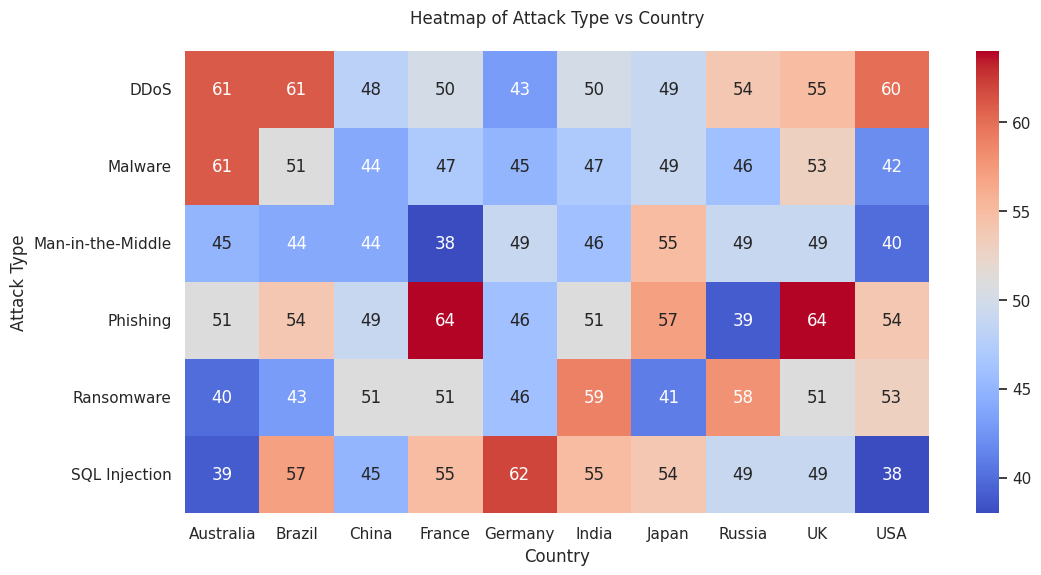

Contingency Table: Attack Type vs Attack Source


Attack Source      Hacker Group  Insider  Nation-state  Unknown
Attack Type                                                    
DDoS                        122      147           137      125
Malware                     117      121           124      123
Man-in-the-Middle           107      107           131      114
Phishing                    125      129           141      134
Ransomware                  118      121           123      131
SQL Injection                97      127           138      141

Chi-Square Test: chi2=9.71, p-value=0.84


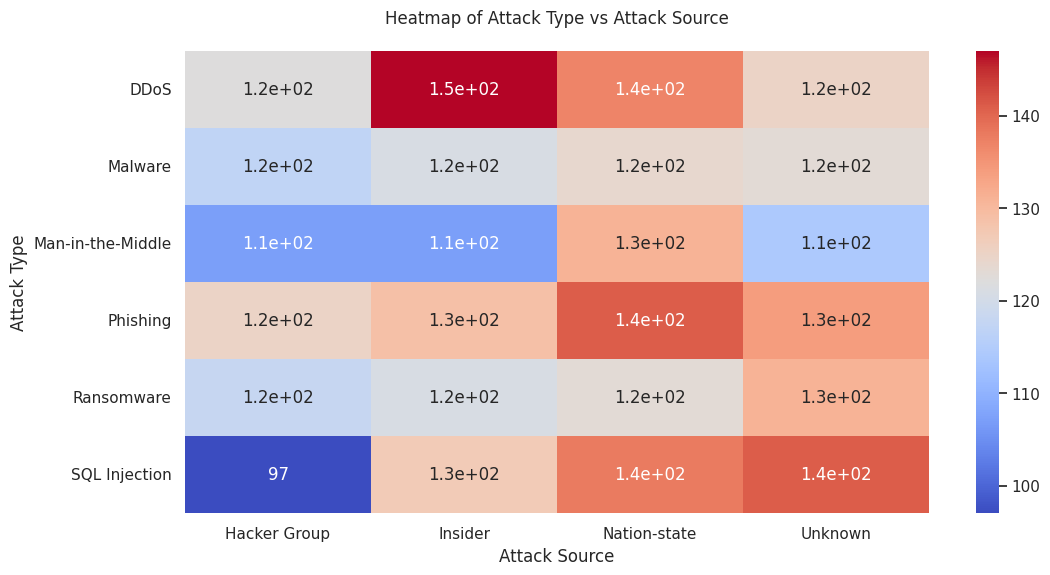

Contingency Table: Defense Mechanism Used vs Security Vulnerability Type


Security Vulnerability Type  Social Engineering  Unpatched Software  \
Defense Mechanism Used                                                
AI-based Detection                          144                 135   
Antivirus                                   156                 152   
Encryption                                  143                 151   
Firewall                                    152                 150   
VPN                                         152                 150   

Security Vulnerability Type  Weak Passwords  Zero-day  
Defense Mechanism Used                                 
AI-based Detection                      139       165  
Antivirus                               163       157  
Encryption                              150       148  
Firewall                                134       149  
VPN                                     144       166

Chi-Square Test: chi2=5.02, p-value=0.96


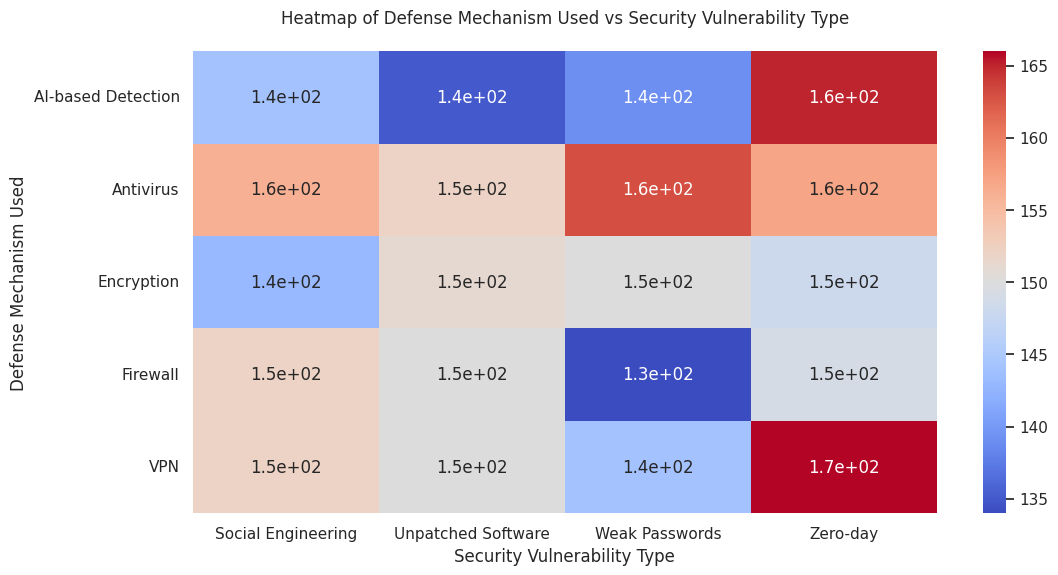

Contingency Table: Target Industry vs Security Vulnerability Type


Security Vulnerability Type  Social Engineering  Unpatched Software  \
Target Industry                                                       
Banking                                     117                 107   
Education                                   115                 101   
Government                                   96                  97   
Healthcare                                  112                 105   
IT                                          107                 112   
Retail                                       97                 109   
Telecommunications                          103                 107   

Security Vulnerability Type  Weak Passwords  Zero-day  
Target Industry                                        
Banking                                 111       110  
Education                                94       109  
Government                               98       112  
Healthcare                              115        97  
IT                                      122       137  
Retail                                  102       115  
Telecommunications                       88       105

Chi-Square Test: chi2=12.32, p-value=0.83


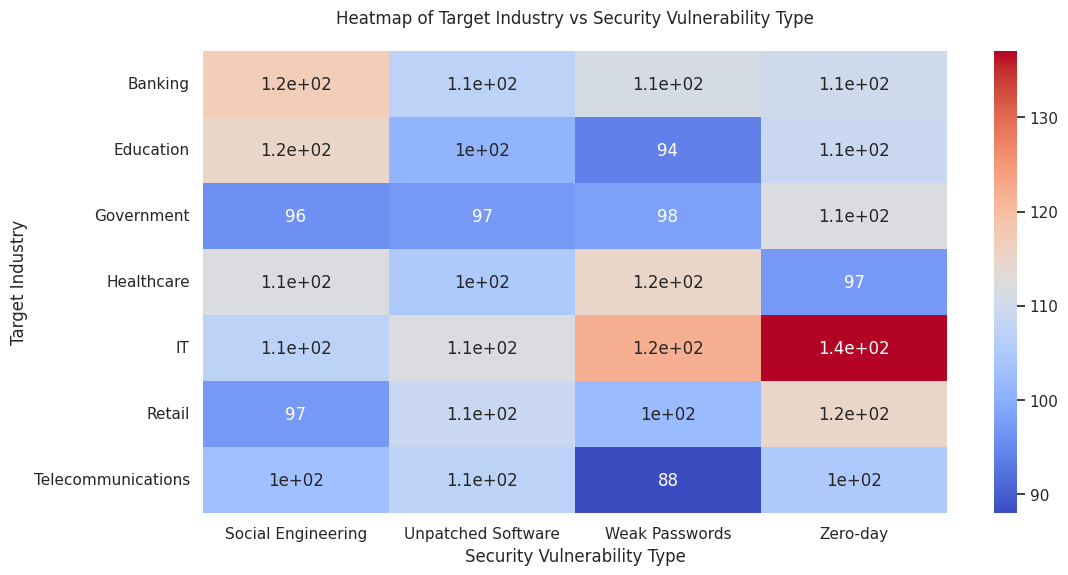

In [19]:
# Contingency Table and Chi-Square Test for Attack Type vs Country
contingency_table_1 = pd.crosstab(df_copy['Attack Type'], df_copy['Country'])
chi2_1, p_1, dof_1, expected_1 = chi2_contingency(contingency_table_1)
print("Contingency Table: Attack Type vs Country")
display(contingency_table_1)
print(f"Chi-Square Test: chi2={chi2_1:.2f}, p-value={p_1:.2f}")
plt.figure(figsize=(12,6))
sns.heatmap(contingency_table_1, annot=True, cmap='coolwarm')
plt.title('Heatmap of Attack Type vs Country', pad=20)
plt.show()

# Contingency Table and Chi-Square Test for Attack Type vs Attack Source
contingency_table_2 = pd.crosstab(df_copy['Attack Type'], df_copy['Attack Source'])
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(contingency_table_2)
print("Contingency Table: Attack Type vs Attack Source")
display(contingency_table_2)
print(f"Chi-Square Test: chi2={chi2_2:.2f}, p-value={p_2:.2f}")
plt.figure(figsize=(12,6))
sns.heatmap(contingency_table_2, annot=True, cmap='coolwarm')
plt.title('Heatmap of Attack Type vs Attack Source', pad=20)
plt.show()

# Contingency Table and Chi-Square Test for Defense Mechanism Used vs Security Vulnerability Type
contingency_table_3 = pd.crosstab(df_copy['Defense Mechanism Used'], df_copy['Security Vulnerability Type'])
chi2_3, p_3, dof_3, expected_3 = chi2_contingency(contingency_table_3)
print("Contingency Table: Defense Mechanism Used vs Security Vulnerability Type")
display(contingency_table_3)
print(f"Chi-Square Test: chi2={chi2_3:.2f}, p-value={p_3:.2f}")
plt.figure(figsize=(12,6))
sns.heatmap(contingency_table_3, annot=True, cmap='coolwarm')
plt.title('Heatmap of Defense Mechanism Used vs Security Vulnerability Type', pad=20)
plt.show()

# Contingency Table and Chi-Square Test for Target Industry vs Security Vulnerability Type
contingency_table_4 = pd.crosstab(df_copy['Target Industry'], df_copy['Security Vulnerability Type'])
chi2_4, p_4, dof_4, expected_4 = chi2_contingency(contingency_table_4)
print("Contingency Table: Target Industry vs Security Vulnerability Type")
display(contingency_table_4)
print(f"Chi-Square Test: chi2={chi2_4:.2f}, p-value={p_4:.2f}")
plt.figure(figsize=(12,6))
sns.heatmap(contingency_table_4, annot=True, cmap='coolwarm')
plt.title('Heatmap of Target Industry vs Security Vulnerability Type', pad=20)
plt.show()

**INSIGHTS:** 

- Attack Type vs Country:

    - chi2 = 41.61, p-value = 0.62: Despite a relatively large chi-square statistic, the p-value is high (0.62), indicating that the observed association between attack type and country is not statistically significant. This means that the distribution of attack types does not seem to vary significantly across different countries in the dataset.

- Attack Type vs Attack Source:

    - chi2 = 9.71, p-value = 0.84: The p-value is very high (0.84), suggesting that there is no statistically significant association between attack type and attack source. This implies that the type of attack does not appear to be related to the source of the attack in the dataset.

- Defense Mechanism Used vs Security Vulnerability Type:

    - chi2 = 5.02, p-value = 0.96: The p-value is extremely high (0.96), indicating that there is no statistically significant relationship between the defense mechanism used and the type of security vulnerability. This suggests that the choice of defense mechanism does not seem to depend on the type of vulnerability in the dataset.

- Target Industry vs Security Vulnerability Type:

    - chi2 = 12.32, p-value = 0.83: Again, the p-value is high (0.83), indicating no statistically significant association between the target industry and the type of security vulnerability. This means that the type of vulnerability does not appear to vary significantly across different industries in the dataset.

### 6.3 Numerical vs. Categorical

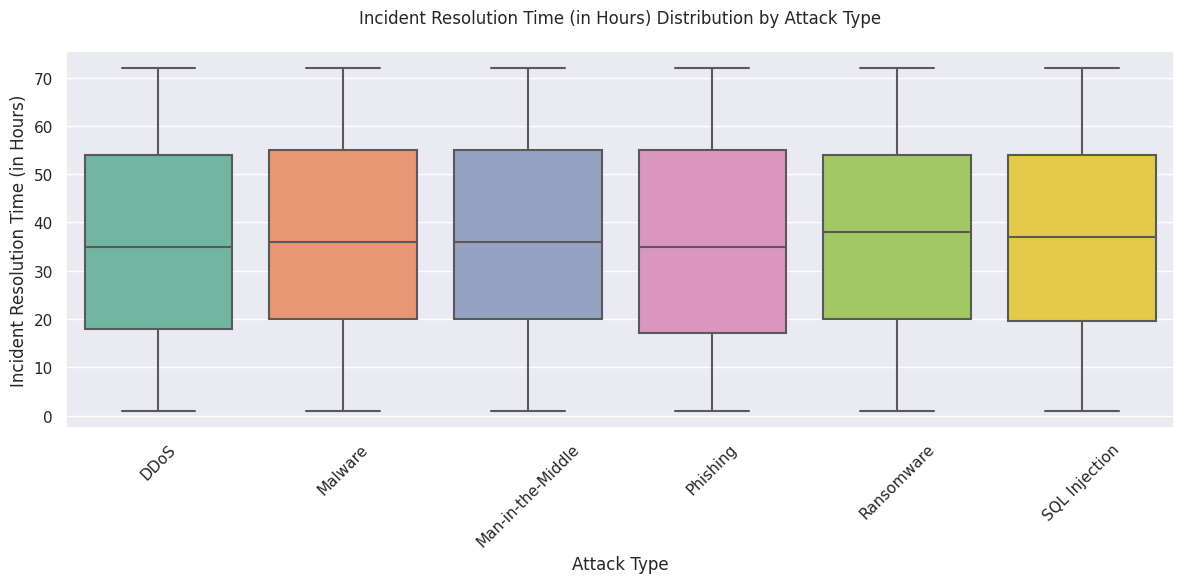

In [20]:
# Attack Type vs Incident Resolution Time (in Hours)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy, x='Attack Type', y='Incident Resolution Time (in Hours)', palette='Set2')
plt.title('Incident Resolution Time (in Hours) Distribution by Attack Type', pad=20)
plt.xlabel('Attack Type')
plt.ylabel('Incident Resolution Time (in Hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# Attack Type vs Financial Loss (in Million $)
attack_types = df_copy['Attack Type'].unique()

# Extract financial loss for each attack type
losses = [df_copy.loc[df_copy['Attack Type'] == at, 'Financial Loss (in Million $)'] for at in attack_types]

# Perform ANOVA
f_stat, p_value = f_oneway(*losses)
print(f"F-statistic: {f_stat}, p-value: {p_value}")

F-statistic: 0.6252176956492915, p-value: 0.6805640335907177


<Figure size 1200x600 with 0 Axes>

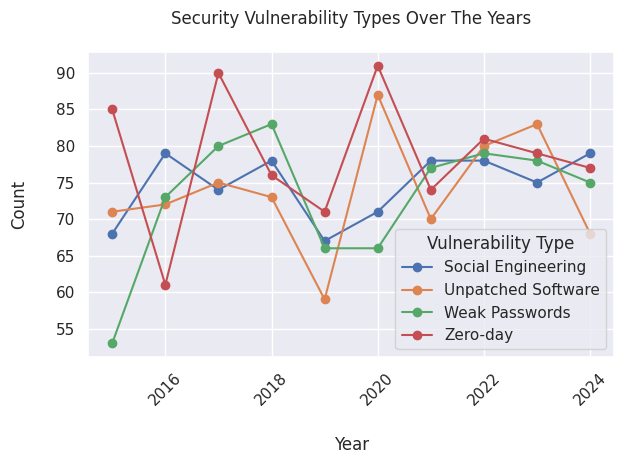

In [22]:
# Aggregate data to get the count of each vulnerability type per year
agg_data = df_copy.pivot_table(index='Year', columns='Security Vulnerability Type', aggfunc='size', fill_value=0)

# Create a line plot to visualize the data
plt.figure(figsize=(12, 6))
agg_data.plot(kind='line', marker='o')
plt.title('Security Vulnerability Types Over The Years', pad=20)
plt.xlabel('Year', labelpad=20)
plt.ylabel('Count', labelpad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Vulnerability Type')
plt.show()

- attack type vs resolution time is plotted in a box and whiskers diagram. All are evenly distributed.
- Attack Type vs Financial Loss (in Million $) gives F-statistic: 0.6252176956492916, p-value: 0.6805640335907177
- Vulnerability type vs year does not show clear linear patters, just waves. At 2016 - 2020 the lines are very unpredictable, but afterwards it became more patterned, indicating more attacks?

**INSIGHTS:** 

-  Attack Type vs Resolution Time:

    - The fact that resolution times are evenly distributed across different attack types suggests that the time it takes to resolve incidents does not significantly vary based on the type of attack. This could indicate that the response strategies are similarly effective or ineffective across different attack types.

-  Attack Type vs Financial Loss (ANOVA Results):

    - The p-value is high (0.6806), which means that the null hypothesis cannot be rejected. This implies that there is no statistically significant difference in the mean financial loss across different attack types. In other words, the financial impact does not seem to vary significantly based on the type of attack.

- Vulnerability Type vs Year:

    - The unpredictable patterns in the early years (2016-2020) could be due to several factors. If the dataset for those years is small, patterns might not be clear. Attackers might have been experimenting with different vulnerabilities, leading to irregular patterns. Incidents might not have been consistently reported or documented.

    - The emergence of more predictable patterns could indicate more attacks happening which could lead to more consistent patterns due to larger sample sizes. Better data collection and analysis might reveal clearer trends. Attackers might have settled on more consistent strategies, leading to more predictable patterns.

In [23]:
df_copy.head()

Country  Year        Attack Type Target Industry  \
0  Germany  2015  Man-in-the-Middle              IT   
1      USA  2015      SQL Injection          Retail   
2   Russia  2015         Ransomware          Retail   
3  Germany  2015               DDoS          Retail   
4    India  2015  Man-in-the-Middle         Banking   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          54.54                    775866       Insider   
1                          26.98                    763017       Insider   
2                          84.08                     71334       Unknown   
3                           7.84                    323011  Nation-state   
4                          97.28                    694308  Nation-state   

  Security Vulnerability Type Defense Mechanism Used  \
0              Weak Passwords     AI-based Detection   
1          Social Engineering               Firewall   
2          Unpatched Software     AI-based Detection   
3          Social Engineering             Encryption   
4              Weak Passwords                    VPN   

   Incident Resolution Time (in Hours)  
0                                   69  
1                                   24  
2                                   26  
3                                   25  
4                                   66

<br>

## 7. Data Exploration & Visualization

In this section, we will analyze the data using visualizations to address the following questions:

**1. General Trends and Patterns**
- How has the frequency of different attack types evolved over the years?

- Which countries experience the highest number of cyberattacks, and how do they compare in terms of financial loss?

- What are the most common security vulnerabilities exploited in each industry?

**2. Financial Impact**
- Which attack types result in the highest financial losses on average?

- Is there a relationship between the number of affected users and financial loss for different attack types?

- How does financial loss vary by target industry and country?

**3. Resolution Time**
- Does the resolution time vary significantly across different attack types or defense mechanisms used?

- Are certain industries better at resolving incidents quickly compared to others?

**4. Vulnerabilities and Defense Mechanisms**
- What are the most common security vulnerabilities exploited by different attack sources (e.g., nation-state vs hacker group)?

- Which defense mechanisms are most commonly used for specific vulnerabilities, and how effective are they (e.g., based on resolution time)?

**5. Temporal Analysis**
- Are there any noticeable trends in the number of incidents or financial losses over time (e.g., pre-2020 vs post-2020)?

- Do certain attack types or vulnerabilities show seasonal or yearly patterns?

**6. Industry-Specific Insights**
- Which industries are most targeted by specific attack types (e.g., healthcare for ransomware)?

- How do industries differ in their choice of defense mechanisms?

**7. Comparative Analysis**
- How do nation-state attacks differ from hacker group attacks in terms of financial loss, affected users, and resolution time?

- Are there differences in attack patterns between developed countries (e.g., USA) and developing countries (e.g., Brazil)?

### 7.1. General Trends and Patterns
- How has the frequency of different attack types evolved over the years?

- Which countries experience the highest number of cyberattacks, and how do they compare in terms of financial loss?

- What are the most common security vulnerabilities exploited in each industry?

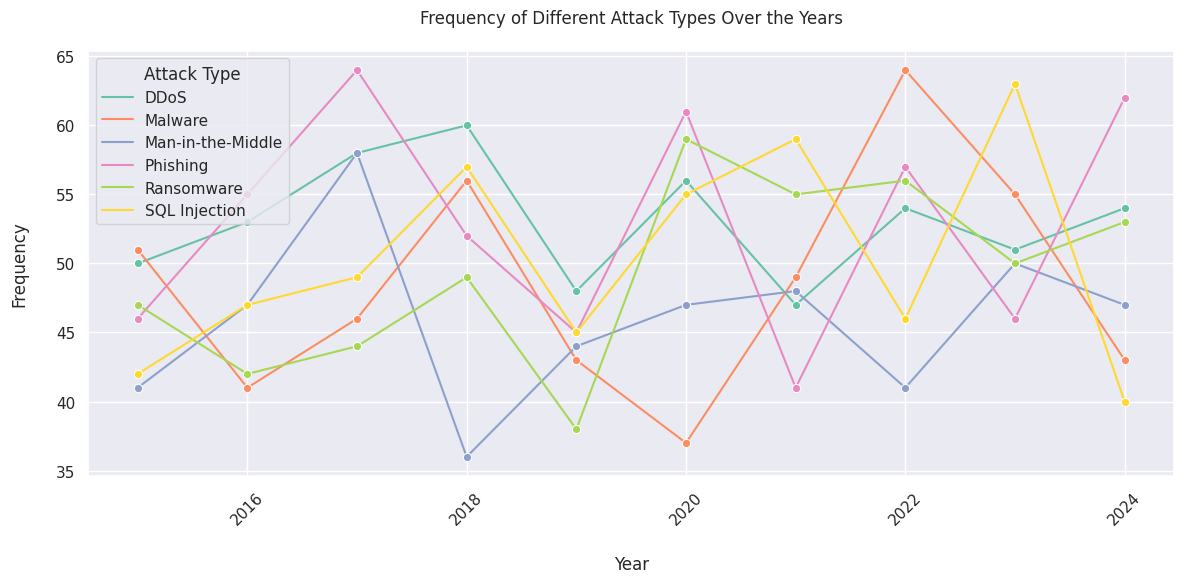

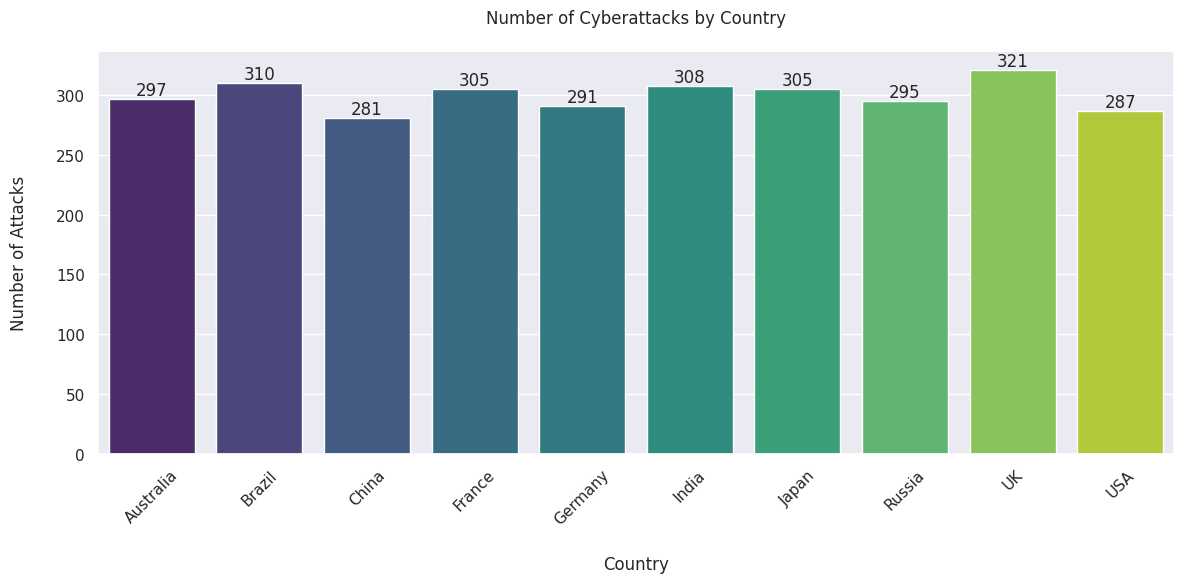

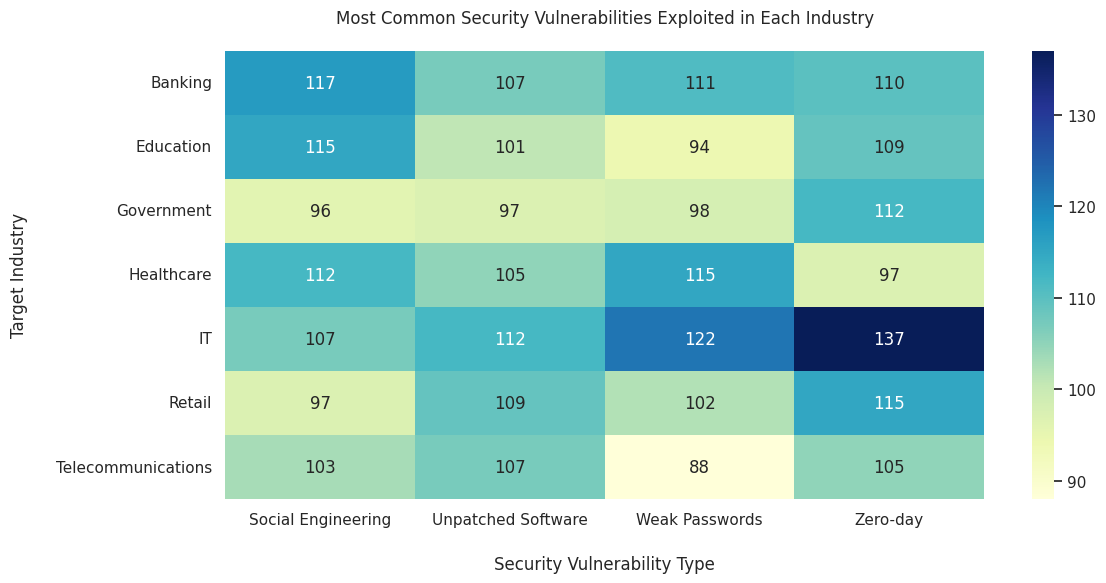

In [24]:
# V1
# Aggregate data to count the frequency of each attack type per year
attack_trends = df_copy.groupby(['Year', 'Attack Type'], observed=False).size().reset_index(name='Count')
# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=attack_trends, x='Year', y='Count', hue='Attack Type', marker='o', palette='Set2')
plt.title('Frequency of Different Attack Types Over the Years', pad=20)
plt.xlabel('Year', labelpad=20)
plt.ylabel('Frequency', labelpad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Aggregate data to count attacks by country
country_attacks = df_copy.groupby('Country', observed=False).size().reset_index(name='Attack Count')

# V2
# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=country_attacks, x='Country', y='Attack Count', palette='viridis')
plt.title('Number of Cyberattacks by Country', pad=20)
plt.xlabel('Country', labelpad=20)
plt.ylabel('Number of Attacks', labelpad=20)
plt.xticks(rotation=45)
for bar in ax.patches:
    height = bar.get_height()
    if height != 0:
        ax.annotate(f'{int(height)}',
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom')
plt.tight_layout()
plt.show()

# V3
# Aggregate data to calculate total financial loss by country
country_loss = df_copy.groupby('Country', observed=False)['Financial Loss (in Million $)'].sum().reset_index()

# Plot using Plotly
fig = px.scatter(country_loss, x='Country', y='Financial Loss (in Million $)', size='Financial Loss (in Million $)',
                 color='Country', title="Financial Loss by Country", labels={'Financial Loss (in Million $)': 'Financial Loss ($M)'})
fig.show(renderer='iframe')

# V4
# Create a pivot table for security vulnerability counts by industry
vulnerability_industry = df_copy.pivot_table(index='Target Industry', columns='Security Vulnerability Type',
                                             aggfunc='size', fill_value=0)
# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(vulnerability_industry, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Most Common Security Vulnerabilities Exploited in Each Industry', pad=20)
plt.xlabel('Security Vulnerability Type', labelpad=20)
plt.ylabel('Target Industry', labelpad=20)
plt.tight_layout()
plt.show()


**INSIGHTS:**

**1. Frequency of Different Attack Types Over the Years**
- The frequency of different attack types does not exhibit a clear upward or downward trend. Instead, it fluctuates significantly, with each type experiencing periodic rises and falls. This wave-like pattern may reflect the evolving strategies of attackers as they adapt to new vulnerabilities or defenses.

- These fluctuations align with broader cybersecurity trends, where certain attack types (e.g., ransomware and phishing) surge in popularity due to their effectiveness or ease of execution, as noted in recent reports.

- The unpredictability in attack type trends could be influenced by external factors such as advancements in attack methods (e.g., AI-powered attacks) or shifts in attacker focus (e.g., targeting IoT devices).


**2. Attack Counts and Financial Loss by Country**
- While the number of attacks per country is relatively close, the UK experiences the highest number of attacks (321), while China has the lowest (281). This suggests that attack frequency is not drastically different across countries.

- However, the financial loss tells a different story: the UK incurs the highest total losses ($16,502.99 million), while China has the lowest ($13,714.47 million). This discrepancy could indicate that China's cybersecurity measures are more effective at mitigating financial damage, even with a similar number of attacks.

- The UK's higher losses might also reflect differences in industry targets or attack sophistication. For example, industries like healthcare or finance, which are often targeted in developed economies, tend to incur higher costs per breach.

- The financial impact differences between countries might also stem from variations in reporting standards, organizational preparedness, or attack sophistication.

**3. Most Common Security Vulnerabilities by Industry**
- The most commonly exploited vulnerability is Zero-Day, particularly within the IT sector. This aligns with global trends where Zero-Day vulnerabilities are highly sought after due to their ability to bypass traditional defenses.

- Other vulnerabilities such as Unpatched Software, Weak Passwords, and Social Engineering are also prevalent but vary by industry:

- Unpatched Software is common in industries with legacy systems like healthcare.

- Weak Passwords often plague retail and small businesses due to less stringent security policies.

- Social Engineering remains a universal threat across sectors due to its reliance on human error rather than technical flaws.

- These patterns suggest that industries need tailored security measures to address their unique vulnerabilities. The dominance of Zero-Day vulnerabilities highlights the importance of proactive threat detection and patch management across industries

### 7.2. Financial Impact
- Which attack types result in the highest financial losses on average?

- Is there a relationship between the number of affected users and financial loss for different attack types?

- How does financial loss vary by target industry and country?

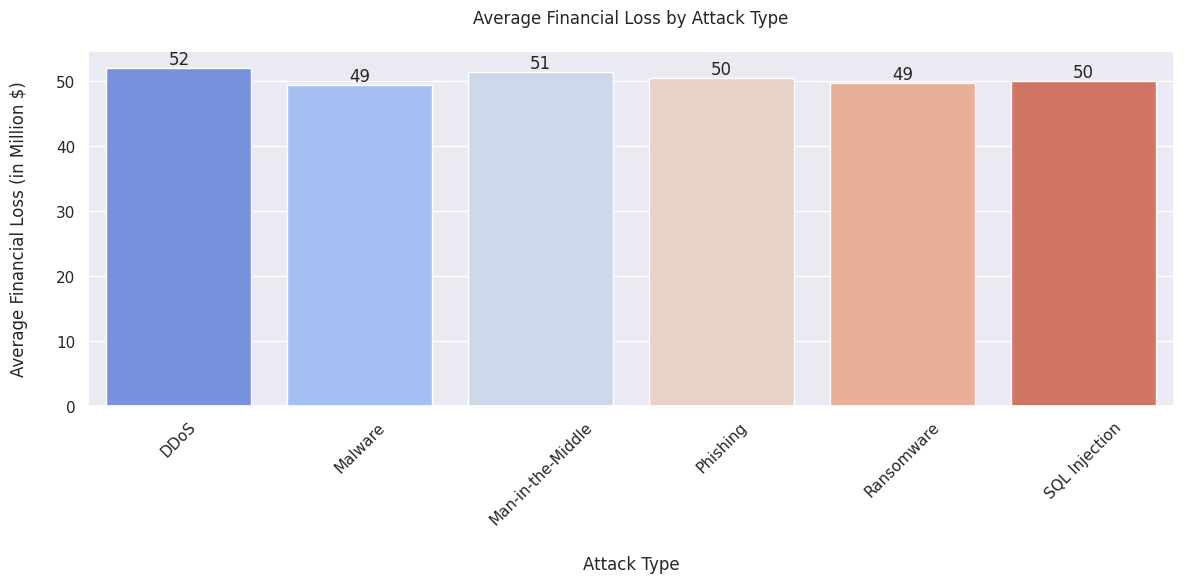

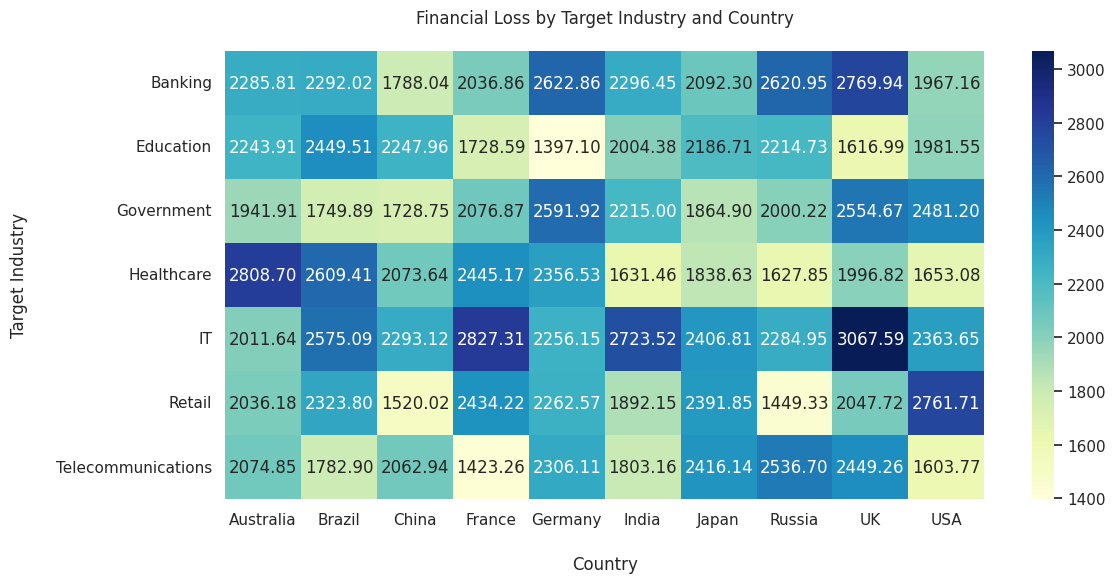

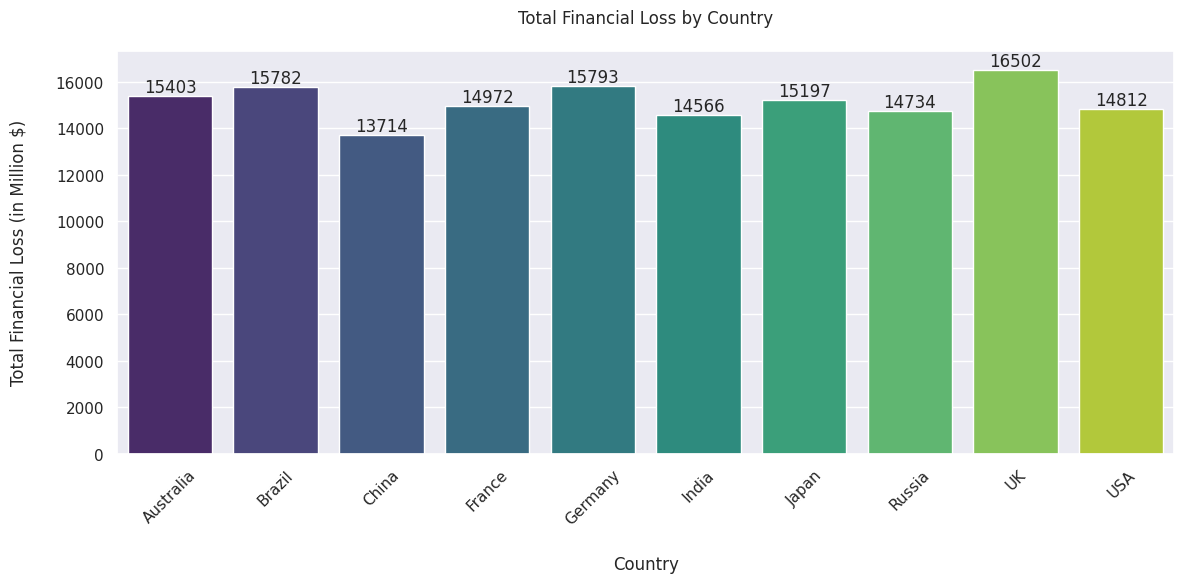

In [25]:
#V1
# Aggregate data to calculate average financial loss per attack type
attack_loss = df_copy.groupby('Attack Type', observed=False)['Financial Loss (in Million $)'].mean().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=attack_loss, x='Attack Type', y='Financial Loss (in Million $)', palette='coolwarm')
plt.title('Average Financial Loss by Attack Type', pad=20)
plt.xlabel('Attack Type', labelpad=20)
plt.ylabel('Average Financial Loss (in Million $)', labelpad=20)
plt.xticks(rotation=45)
for bar in ax.patches:
    height = bar.get_height()
    if height != 0:
        ax.annotate(f'{int(height)}',
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom')
plt.tight_layout()
plt.show()

#V2
fig = px.scatter(df_copy, x='Number of Affected Users', y='Financial Loss (in Million $)', 
                 color='Attack Type', size='Financial Loss (in Million $)', 
                 title="Relationship Between Number of Affected Users and Financial Loss",
                 labels={'Number of Affected Users': 'Affected Users', 'Financial Loss (in Million $)': 'Financial Loss ($M)'})
fig.show(renderer='iframe')

#V3
# Create a pivot table for financial loss by industry
industry_loss = df_copy.pivot_table(index='Target Industry', columns='Country', values='Financial Loss (in Million $)', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(industry_loss, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Financial Loss by Target Industry and Country', pad=20)
plt.xlabel('Country', labelpad=20)
plt.ylabel('Target Industry', labelpad=20)
plt.tight_layout()
plt.show()

#V4
# Aggregate data to calculate total financial loss per country
country_loss = df_copy.groupby('Country', observed=False)['Financial Loss (in Million $)'].sum().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=country_loss, x='Country', y='Financial Loss (in Million $)', palette='viridis')
plt.title('Total Financial Loss by Country', pad=20)
plt.xlabel('Country', labelpad=20)
plt.ylabel('Total Financial Loss (in Million $)', labelpad=20)
plt.xticks(rotation=45)
for bar in ax.patches:
    height = bar.get_height()
    if height != 0:
        ax.annotate(f'{int(height)}',
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom')
plt.tight_layout()
plt.show()

**INSIGHTS:**

**1. Financial Loss Per Attack Type**
- The financial loss per attack type shows a uniform distribution, with only minor differences between categories. The average financial loss for DDoS attacks is the highest at $50 million, while Malware and Ransomware are slightly lower at $49 million.

- This uniformity could suggest that the financial impact of cyberattacks is not heavily influenced by the type of attack but rather by other factors such as the target industry, country, or size of the organization. For example, industries like healthcare or finance often face higher recovery costs due to sensitive data and regulatory penalties.

**2. Relationship Between Affected Users and Financial Loss**
- There is a positive correlation between the number of affected users and financial loss across all attack types. As the number of affected users increases, the financial loss also rises. This is consistent with global trends where larger breaches (affecting more users) tend to incur higher costs due to data recovery, legal liabilities, and reputational damage.

- For instance, breaches involving millions of records often lead to class-action lawsuits, regulatory fines, and significant downtime, amplifying their financial impact.

**3. Industries Most Impacted by Cyberattacks**
- The most targeted industries are Healthcare, Retail, and Banking. These sectors are attractive targets due to their reliance on sensitive personal or financial data, which can be monetized by attackers.

- The IT sector suffers the most attacks globally, likely due to its central role in enabling digital infrastructure across industries.

- Industries like Telecommunications, Government, and Education are attacked less frequently but still face significant risks. 

**4. Countries Most Impacted**
- The UK experiences the highest financial losses, totaling $16,502.99 million. This aligns with its advanced digital economy and high-value targets in sectors like finance and healthcare.

- In contrast, China incurs the lowest financial losses ($13,714.47 million) despite having a similar number of attacks. This could indicate stronger cybersecurity defenses or less costly recovery processes in China.

### 7.3. Resolution Time**
- Does the resolution time vary significantly across different attack types or defense mechanisms used?

- Are certain industries better at resolving incidents quickly compared to others?


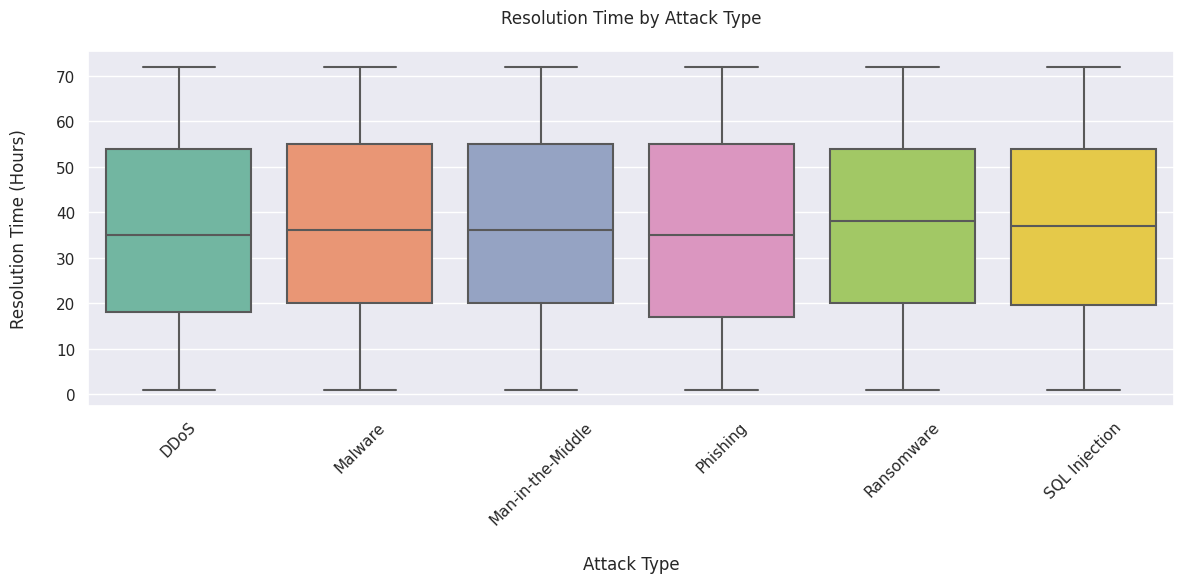

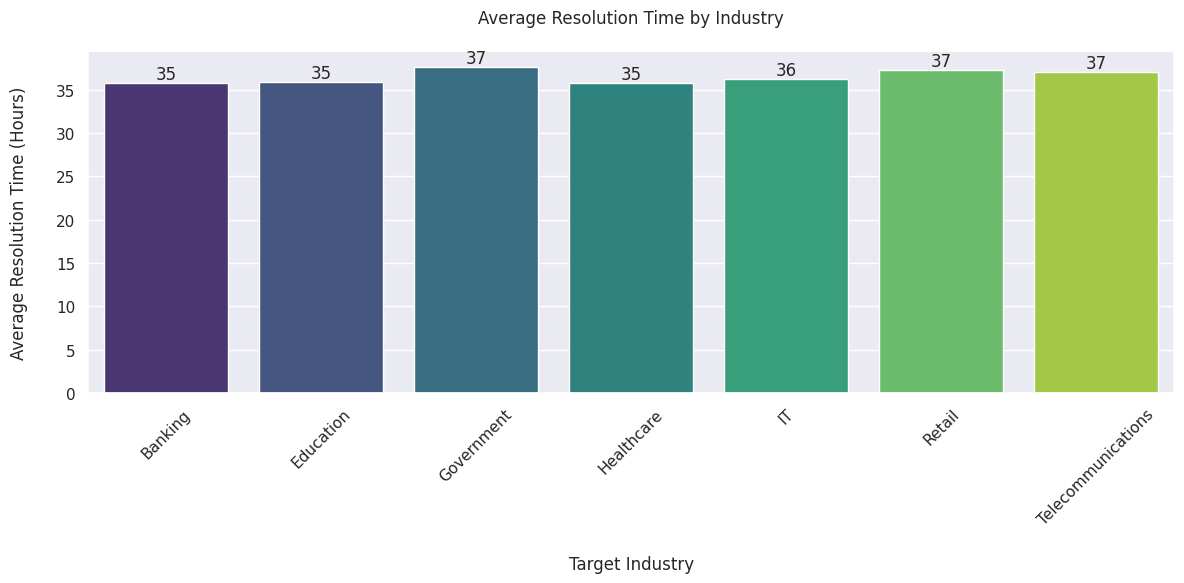

In [26]:
#V1
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy, x='Attack Type', y='Incident Resolution Time (in Hours)', palette='Set2')
plt.title('Resolution Time by Attack Type', pad=20)
plt.xlabel('Attack Type', labelpad=20)
plt.ylabel('Resolution Time (Hours)', labelpad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#V2
# Aggregate data to calculate average resolution time per industry
industry_resolution = df_copy.groupby('Target Industry', observed=False)['Incident Resolution Time (in Hours)'].mean().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=industry_resolution, x='Target Industry', y='Incident Resolution Time (in Hours)', palette='viridis')
plt.title('Average Resolution Time by Industry', pad=20)
plt.xlabel('Target Industry', labelpad=20)
plt.ylabel('Average Resolution Time (Hours)', labelpad=20)
plt.xticks(rotation=45)
for bar in ax.patches:
    height = bar.get_height()
    if height != 0:
        ax.annotate(f'{int(height)}',
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom')
plt.tight_layout()
plt.show()

#V3
fig = px.scatter(df_copy, x='Defense Mechanism Used', y='Incident Resolution Time (in Hours)', 
                 color='Target Industry', size='Incident Resolution Time (in Hours)', 
                 title="Resolution Time by Defense Mechanism and Industry",
                 labels={'Incident Resolution Time (in Hours)': 'Resolution Time (Hours)'})
fig.update_layout(xaxis=dict(tickangle=-45))
fig.show()

**INSIGHTS:**

**1. Attack Type vs. Resolution Times**
- The uniform distribution of resolution times across different attack types suggests that the time it takes to resolve incidents does not vary significantly based on the type of attack. This could indicate that organizations might be using similar response strategies across different attack types, which results in consistent resolution times. Alternatively, it could imply that the response strategies are either similarly effective or ineffective across attack types, leading to uniform resolution times.

**2. Resolution Time by Industry**
- The resolution time by industry also shows a uniform distribution, with some industries (Government, Retail, and Telecommunications) taking 3 hours longer on average to resolve incidents compared to others. 

- Government and Telecommunications often have complex systems that require more time to resolve due to their interconnected nature. 

- Industries like Government and Retail might face stricter regulatory requirements, leading to more thorough (and thus longer) incident resolution processes.

- Differences in resource allocation or prioritization could also influence resolution times across industries.

**3. Resolution Time per Industry and Defense Mechanism**
- The scatter plot showing a straight line with no outliers indicates a linear relationship between the defense mechanism used and resolution time. 

- The choice of defense mechanism might directly impact how quickly incidents are resolved. For example, more advanced mechanisms might reduce resolution times.

-  The lack of outliers implies that the response process is consistent across different defense mechanisms, with no significant deviations.

### 7.4. Vulnerabilities and Defense Mechanisms**
- What are the most common security vulnerabilities exploited by different attack sources (e.g., nation-state vs hacker group)?

- Which defense mechanisms are most commonly used for specific vulnerabilities, and how effective are they (e.g., based on resolution time)?

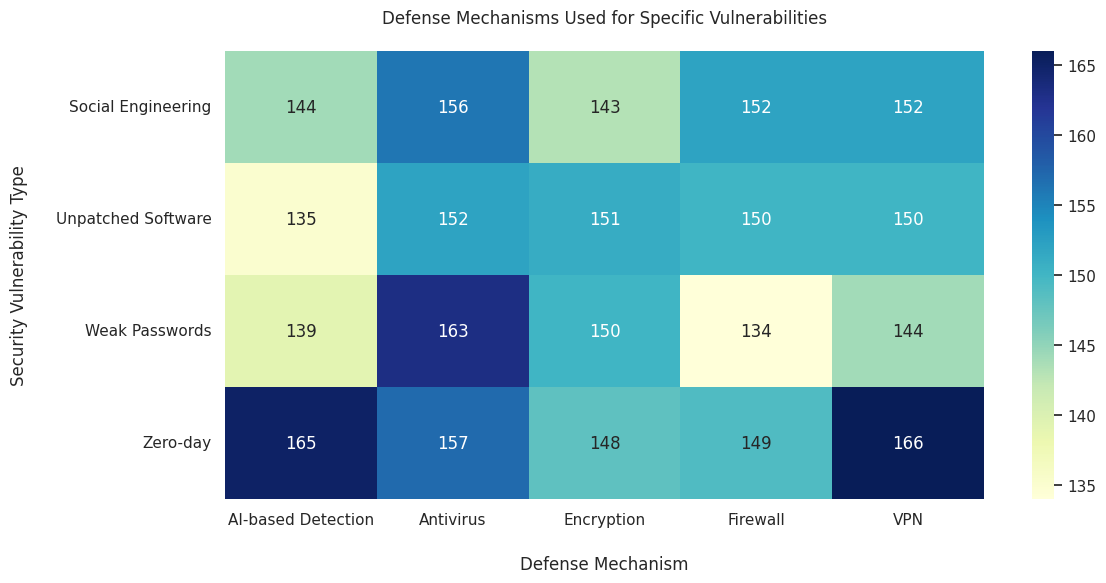

In [27]:
#V1
# Aggregate data to count vulnerabilities exploited by each attack source
vulnerability_source = df_copy.groupby(['Attack Source', 'Security Vulnerability Type'], observed=False).size().reset_index(name='Count')
fig = px.bar(vulnerability_source, 
             x='Security Vulnerability Type', 
             y='Count', 
             color='Attack Source', 
             title='Most Common Security Vulnerabilities Exploited by Attack Sources',
             labels={'Security Vulnerability Type': 'Vulnerability Type', 'Count': 'Number of Exploits'},
             barmode='stack')
fig.update_layout(xaxis=dict(title='Security Vulnerability Type', tickangle=-45),
                  yaxis=dict(title='Count'),
                  legend_title='Attack Source',
                  title=dict(x=0.5))  
fig.show(renderer='iframe')

#V2
# Create a pivot table for defense mechanisms and vulnerabilities
defense_vulnerability = df_copy.pivot_table(index='Security Vulnerability Type', columns='Defense Mechanism Used', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(defense_vulnerability, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Defense Mechanisms Used for Specific Vulnerabilities', pad=20)
plt.xlabel('Defense Mechanism', labelpad=20)
plt.ylabel('Security Vulnerability Type', labelpad=20)
plt.tight_layout()
plt.show()

**INSIGHTS:**

**1. Attack Sources and Security Vulnerabilities**
- The data indicates that insiders and unknown sources account for the majority of attacks. This aligns with broader cybersecurity trends where insider threats are significant due to their access privileges and potential for intentional or accidental misuse. Unknown sources highlight gaps in attribution, where attackers evade identification through advanced techniques.

- The uniformity in attack sources across vulnerabilities might suggest either:

    - A lack of detailed data differentiation in the dataset.

    - A broad applicability of vulnerabilities across multiple attack sources.

**2. Defense Mechanisms for Specific Vulnerabilities**
- Zero-Day Vulnerabilities: The most common defense mechanisms used are AI-based detection and VPNs, reflecting the need for proactive measures and secure network connections to counter these sophisticated attacks.

- Weak Passwords: Antivirus software is predominantly used, possibly because weak passwords often lead to malware infections, which antivirus tools are designed to address.

- Other Vulnerabilities: Defense mechanisms like firewalls, encryption, and antivirus tools are evenly distributed across other vulnerabilities, suggesting a generalized approach to cybersecurity.

### 7.5. Temporal Analysis**
- Are there any noticeable trends in the number of incidents or financial losses over time (e.g., pre-2020 vs post-2020)?

- Do certain attack types or vulnerabilities show seasonal or yearly patterns?

In [28]:
#V1
# Aggregate data to count the number of incidents per year
incident_trends = df_copy.groupby('Year', observed=False).size().reset_index(name='Incident Count')
fig = px.line(incident_trends, x='Year', y='Incident Count', 
              title='Number of Incidents Over Time',
              labels={'Year': 'Year', 'Incident Count': 'Number of Incidents'},
              markers=True)
fig.update_layout(title_x=0.5, xaxis=dict(tickmode='linear'))
fig.show(renderer='iframe')

In [29]:
#V2
# Aggregate data to calculate total financial loss per year
financial_loss_trends = df_copy.groupby('Year', observed=False)['Financial Loss (in Million $)'].sum().reset_index()
fig = px.line(financial_loss_trends, x='Year', y='Financial Loss (in Million $)', 
              title='Total Financial Loss Over Time',
              labels={'Year': 'Year', 'Financial Loss (in Million $)': 'Financial Loss ($M)'},
              markers=True)
fig.update_layout(title_x=0.5, xaxis=dict(tickmode='linear'))  # Center title and ensure all years are shown
fig.show(renderer='iframe')

In [30]:
#V3
# Aggregate data to count the frequency of each attack type per year
attack_type_trends = df_copy.groupby(['Year', 'Attack Type'], observed=False).size().reset_index(name='Count')
fig = px.line(attack_type_trends, x='Year', y='Count', color='Attack Type',
              title='Frequency of Attack Types Over Time',
              labels={'Year': 'Year', 'Count': 'Frequency'},
              markers=True)
fig.update_layout(title_x=0.5, xaxis=dict(tickmode='linear'))  # Center title and ensure all years are shown
fig.show(renderer='iframe')

In [31]:
#V4
# Aggregate data to count the frequency of each vulnerability type per year
vulnerability_trends = df_copy.groupby(['Year', 'Security Vulnerability Type'], observed=False).size().reset_index(name='Count')
fig = px.line(vulnerability_trends, x='Year', y='Count', color='Security Vulnerability Type',
              title='Frequency of Security Vulnerabilities Over Time',
              labels={'Year': 'Year', 'Count': 'Frequency'},
              markers=True)
fig.update_layout(title_x=0.5, xaxis=dict(tickmode='linear'))
fig.show(renderer='iframe')

**INSIGHTS:**

**1. Huge Dip in Attacks in 2019**
- The significant decrease in attacks in 2019 followed by a spike and subsequent flattening could be attributed to several factors:

    - Major cybersecurity events or campaigns might have temporarily reduced attack volumes before attackers adapted and resumed their activities.

    - Enhanced cybersecurity measures globally could have led to a temporary decrease in successful attacks.

    - Variations in reporting practices or data collection methods might also contribute to these patterns.

**2. Financial Loss Pattern**
- The financial loss pattern mirroring the attack frequency suggests that the financial impact is closely tied to the number of incidents. This could indicate that:

    - The complexity or effectiveness of attacks did not change significantly over time, leading to consistent financial losses per incident.

    - The types of industries targeted remained consistent, resulting in similar financial impacts.

**3. Attack Type Over Years**
- The random fluctuation in attack types until the 2020s, followed by a flattening, might reflect:

    - Attackers continuously adapt their strategies, leading to fluctuations in attack types until they settle on more effective methods.

    - Enhanced detection capabilities might have reduced the effectiveness of certain attack types, leading to a stabilization in attack patterns.

### 7.6. Industry-Specific Insights
- Which industries are most targeted by specific attack types (e.g., healthcare for ransomware)?

- How do industries differ in their choice of defense mechanisms?

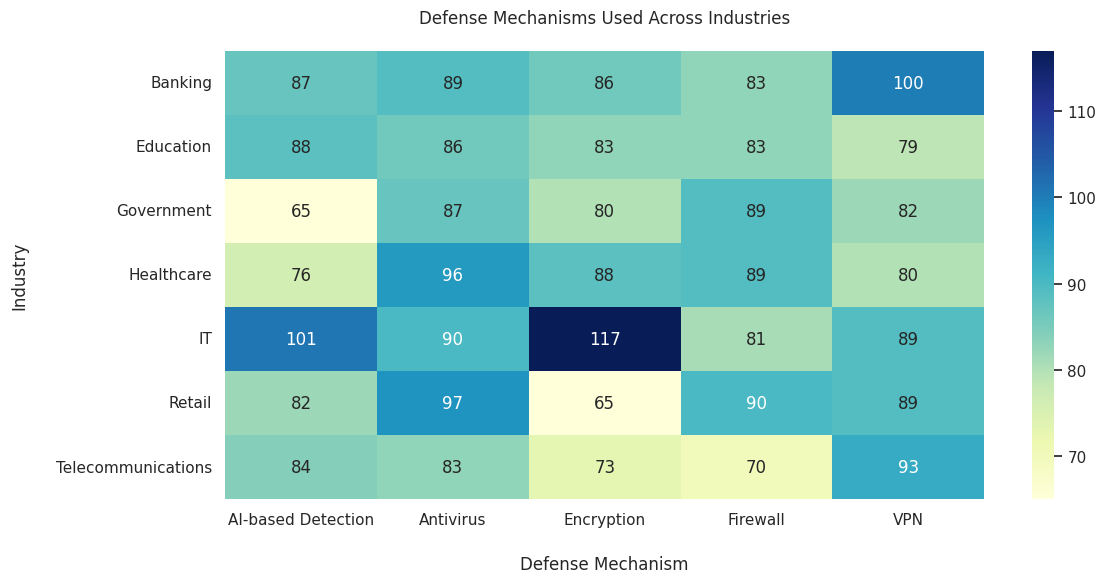

In [32]:
#V1
# Aggregate data to count the frequency of attack types per industry
industry_attack = df_copy.groupby(['Target Industry', 'Attack Type'], observed=False).size().reset_index(name='Count')
fig = px.bar(industry_attack, 
             x='Target Industry', 
             y='Count', 
             color='Attack Type', 
             title='Industries Most Targeted by Specific Attack Types',
             labels={'Target Industry': 'Industry', 'Count': 'Number of Attacks'},
             barmode='stack')
fig.update_layout(xaxis=dict(title='Industry', tickangle=-45),
                  yaxis=dict(title='Number of Attacks'),
                  legend_title='Attack Type',
                  title=dict(x=0.5)) 
fig.show(renderer='iframe')

#V2
# Create a pivot table for defense mechanisms and industries
industry_defense = df_copy.pivot_table(index='Target Industry', columns='Defense Mechanism Used', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(industry_defense, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Defense Mechanisms Used Across Industries', pad=20)
plt.xlabel('Defense Mechanism', labelpad=20)
plt.ylabel('Industry', labelpad=20)
plt.tight_layout()
plt.show()

**INSIGHTS:**

**1. Attack Types by Industry**
- Banking/Retail: These industries are primarily targeted by phishing attacks, which exploit their large customer bases and financial transactions. Phishing is effective due to its reliance on social engineering and its ability to bypass traditional defenses.

- Education: The attack distribution is uniform, suggesting that no particular attack type dominates. This could reflect the diverse vulnerabilities present in educational institutions, ranging from malware to phishing.

- Government: Predominantly targeted by SQL injection attacks, which aim to exploit databases containing sensitive information like citizen records or classified data.

- Healthcare: Frequently targeted by malware, likely due to its reliance on legacy systems and the critical nature of patient data.

- IT/Telecommunications: These sectors experience a high volume of DDoS attacks, reflecting their central role in digital infrastructure and the attackers' desire to disrupt operations.

**2. Defense Mechanisms Used by Industries**
- IT Sector: Relies heavily on encryption, likely due to its need to secure communications and sensitive operational data.

- Other Industries: Use a standardized mix of defense mechanisms, including:

    - Antivirus

    - Firewalls

    - VPNs

    - AI-Based Detection

- The least used mechanisms are encryption and AI-based detection, possibly due to their higher implementation costs or technical complexity.

- The most common defense mechanism across industries is the use of firewalls, which provide a basic layer of protection against unauthorized access.

### 7.7. Comparative Analysis
- How do nation-state attacks differ from hacker group attacks in terms of financial loss, affected users, and resolution time?

- Are there differences in attack patterns between developed countries (e.g., USA) and developing countries (e.g., Brazil)?

In [33]:
#V1
# Aggregate data for nation-state vs hacker group
comparison_data = df_copy.groupby('Attack Source', observed=False)[['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']].mean().reset_index()
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Bar(x=comparison_data['Attack Source'], 
                     y=comparison_data['Number of Affected Users'],
                     name='Number of Affected Users',
                     hovertemplate=
                     'Attack Source: %{x}<br>' +
                     'Number of Affected Users: %{y:,.0f}<br>' +
                     'Financial Loss (M$): %{customdata[0]:,.2f}<br>' +
                     'Resolution Time (Hours): %{customdata[1]:.2f}<br>' +
                     '<extra></extra>',
                     customdata=comparison_data[['Financial Loss (in Million $)', 'Incident Resolution Time (in Hours)']].values),
              row=1, col=1)
fig.update_layout(title='Comparison of Nation-State vs Hacker Group Attacks',
                  xaxis_title='Attack Source',
                  yaxis_title='Number of Affected Users',
                  title_x=0.5) 
fig.show(renderer='iframe')

In [34]:
#V2
# Aggregate data by country type (developed vs developing)
country_data = df_copy.groupby('Country', observed=False)[['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']].mean().reset_index()
country_data['Country Type'] = country_data['Country'].apply(lambda x: 'Developed' if x in ['USA', 'UK', 'Germany'] else 'Developing')
fig = px.box(country_data, 
             x='Country Type', 
             y='Financial Loss (in Million $)', 
             color='Country Type',
             title='Financial Loss Comparison: Developed vs Developing Countries',
             labels={'Country Type': 'Country Type', 'Financial Loss (in Million $)': 'Financial Loss ($M)'})

fig.update_layout(xaxis=dict(title='Country Type'), 
                  yaxis=dict(title='Financial Loss ($M)'), 
                  title=dict(x=0.5)) 
fig.show(renderer='iframe')

**INSIGHTS:**

**1. Attack Source Analysis**
- The distribution of attacks across different sources is relatively uniform. While attacks by Hacker Groups are the most common, their financial impact and user impact aren't significantly different from attacks by other sources. This suggests that:

- Other attack sources, like Nation-State actors, might be fewer in number but more targeted and effective, leading to comparable damage.

- The success rate and impact of attacks are not solely determined by the attack source but are also influenced by the vulnerabilities exploited and the defenses in place.

**2. Developed vs. Developing Countries**
- Developed countries tend to suffer larger financial losses, as reflected in the closer range between Q1 and Q3 in the box plot. This indicates:

    - Higher value assets are targeted, leading to greater financial impact per incident.

    - Stricter regulatory penalties are incurred for data breaches.

- Developing countries show a larger gap between the range and Q1/Q3, making the whisker diagram look more uniform. This implies:

    - A wider range of attack outcomes in developing countries, from minor disruptions to significant losses.

    - Limited cybersecurity resources, leading to longer resolution times and greater overall impact.

## 8. Final Conclusion

The exploratory data analysis of cyber threats over the years reveals several key insights across general trends, financial impacts, resolution times, vulnerabilities, defense mechanisms, and comparative aspects.

### Key Findings

**General Trends and Patterns:**

- The frequency of different attack types fluctuates over the years, with no clear dominant trend, indicating a dynamic cybersecurity landscape where attackers continuously adapt their strategies.

- Developed countries like the UK and USA experience the highest number of cyberattacks but vary in financial losses, suggesting differences in cybersecurity effectiveness and targeted assets.

- Common security vulnerabilities exploited across industries include Zero-Day exploits, unpatched software, weak passwords, and social engineering, emphasizing the need for comprehensive security measures.

**Financial Impact:**

- The average financial losses per attack type are relatively uniform, highlighting that the financial impact of cyberattacks is not solely determined by the attack type.

- A positive correlation exists between the number of affected users and financial losses, underscoring that larger breaches incur higher costs.

- Financial losses vary significantly by target industry and country, with developed nations suffering greater financial impacts due to high-value assets and stricter regulatory penalties.

**Resolution Time:**

- Resolution times are relatively uniform across different attack types, suggesting that incident response strategies are consistent but may not be optimized for specific attacks.

- Government, retail, and telecommunications sectors often take longer to resolve incidents, indicating challenges related to the complexity of systems, regulatory compliance, and resource allocation.

**Vulnerabilities and Defense Mechanisms:**

- Insider threats and unknown sources account for a significant proportion of attacks, emphasizing the importance of internal security measures and improved threat attribution.

- AI-based detection and VPNs are commonly used for Zero-Day exploits, while antivirus software is prevalent for weak passwords. However, the even distribution of defense mechanisms across vulnerabilities indicates a need for tailored strategies.

**Temporal Analysis:**

- A notable dip in attacks occurred in 2019, followed by a spike and flattening, reflecting global events, improved defenses, or reporting changes.

- Attack types fluctuate randomly over the years but tend to stabilize post-2020, indicating an adaptation in attacker behavior and improved detection capabilities.

**Industry-Specific Insights:**

- Banking and retail sectors are primarily targeted by phishing attacks, education faces a uniform distribution of threats, government is prone to SQL injection, healthcare is susceptible to malware, and IT/telecommunications experience DDoS attacks.

- The IT sector relies heavily on encryption, while other industries employ a standardized mix of antivirus, firewalls, VPNs, and AI-based detection mechanisms.

**Comparative Analysis:**

- Attack sources are somewhat uniform, with hacker groups being the most common. However, financial losses and user impacts do not differ significantly across attack sources, suggesting similar levels of effectiveness.

- Developed countries suffer larger financial losses than developing countries, reflecting the presence of high-value targets and stricter regulatory environments.


### Final Thoughts
This analysis highlights the dynamic and multifaceted nature of cyber threats, emphasizing the need for comprehensive and adaptive cybersecurity strategies. Tailored security measures based on industry-specific risks, proactive threat detection, robust defense mechanisms, and continuous monitoring are essential to mitigate the financial and operational impacts of cyber threats effectively. The need for better, more granular data is needed to determine specific differences between attacks, defense mechanisms and industries. Further research and analysis are warranted to enhance our understanding of these complex patterns and inform targeted cybersecurity efforts.
